In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('../../decision_trees/CreditScoring.csv')

In [3]:
df.head(3)

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985


# Data Cleaning

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.dtypes
# Here some features despite being `int`
# are categorical.
# Ex: status, home, marital, records, job

status       int64
seniority    int64
home         int64
time         int64
age          int64
marital      int64
records      int64
job          int64
expenses     int64
income       int64
assets       int64
debt         int64
amount       int64
price        int64
dtype: object

In [6]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

In [7]:
df.status = df.status.map(status_values)
df.home = df.home.map(home_values)
df.marital = df.marital.map(marital_values)
df.records = df.records.map(records_values)
df.job = df.job.map(job_values)

In [8]:
df.head(5)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [9]:
df.dtypes
# look again at changed values

status       object
seniority     int64
home         object
time          int64
age           int64
marital      object
records      object
job          object
expenses      int64
income        int64
assets        int64
debt          int64
amount        int64
price         int64
dtype: object

In [10]:
df.describe().round()
# `max` has some strange big values. It's a type of
# encoding to deal with missing values

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [11]:
for col in ['income', 'assets', 'debt']:
    df[col] = df[col].replace(to_replace=99999999,
                              value=np.nan)

In [12]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [13]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [14]:
# remove 'unknown' as we need only default/non-default
df = df[df.status != 'unk'].reset_index(drop=True)

In [15]:
df.status.value_counts()

ok         3200
default    1254
Name: status, dtype: int64

In [16]:
df.isnull().sum()
# deal with missing further

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_valid = train_test_split(full_train, test_size=0.25, random_state=11)

In [19]:
df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = (df_train.status == 'default').astype(int).values
y_valid = (df_valid.status == 'default').astype(int).values
y_test = (df_test.status == 'default').astype(int).values

In [21]:
del df_test['status']
del df_valid['status']
del df_train['status']

In [22]:
df_train.head(4)

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079


# Decision Trees

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [24]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [25]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [26]:
dv.get_feature_names()

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [27]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
valid_dicts = df_valid.fillna(0).to_dict(orient='records')
X_valid = dv.transform(valid_dicts)

In [29]:
y_pred = dt.predict_proba(X_valid)[:, 1]

In [30]:
# for valid dataset
roc_auc_score(y_valid, y_pred)

0.7389079944782155

In [31]:
y_pred_train = dt.predict_proba(X_train)[:, 1]

In [32]:
# for train dataset
roc_auc_score(y_train, y_pred_train)

0.7761016984958594

![alt text](overfitting.jpg)

In [33]:
from sklearn.tree import export_text

In [34]:
tree_text = export_text(dt, feature_names=dv.feature_names_)

In [35]:
print(tree_text)

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0



![alt text](dt.jpg)

# Explanation

In [69]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default']
]

In [75]:
df_ex = pd.DataFrame(data, columns=['assets', 'status'])

In [76]:
df_ex.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [74]:
Ts = [2000, 3000, 4000, 5000, 8000]

In [77]:
from IPython.display import display

In [88]:
for t in Ts:
    print(t)
    left= df_ex[df_ex.assets <= t]
    right = df_ex[df_ex.assets > t]
    
    display('left', left)
    print(left.status.value_counts(normalize=True))
    
    display('right', right)
    print(right.status.value_counts(normalize=True))

2000


'left'

,assets,status
1,2000,default
2,0,default


default    1.0
Name: status, dtype: float64


'right'

,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64
3000


'left'

,assets,status
1,2000,default
2,0,default
7,3000,default


default    1.0
Name: status, dtype: float64


'right'

,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64
4000


'left'

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


'right'

,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64
5000


'left'

,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.5
ok         0.5
Name: status, dtype: float64


'right'

,assets,status
0,8000,default
6,9000,ok


default    0.5
ok         0.5
Name: status, dtype: float64
8000


'left'

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


'right'

,assets,status
6,9000,ok


ok    1.0
Name: status, dtype: float64


![alt text](table.jpg)

![alt text](table2.jpg)

<h3>Decision Tree learning algorithm</h3>
    
    - find the best split
    - stop if max_depth is reached
    - if left is sufficiently large (min_samples_leaf
            isn't reached) AND not pure:
                -> repeat for left
     - if right is sufficiently large (min_samples_leaf
            isn't reached) AND not pure:
                -> repeat for right

+ to measure impurity there are various criteria:
    - gini
    - entropy
    - misclassification

# Parameter tuning

In [36]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_valid)[:,1]
    auc = roc_auc_score(y_valid, y_pred)
    
    print(f"depth: {d}; auc: {round(auc,3)}")

depth: 1; auc: 0.606
depth: 2; auc: 0.669
depth: 3; auc: 0.739
depth: 4; auc: 0.761
depth: 5; auc: 0.767
depth: 6; auc: 0.758
depth: 10; auc: 0.712
depth: 15; auc: 0.666
depth: 20; auc: 0.658
depth: None; auc: 0.65


In [62]:
# min_samples_leaf is a min number of data required
# to be a leaf node
temp_scores = []

for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        
        y_pred = dt.predict_proba(X_valid)[:,1]
        auc = roc_auc_score(y_valid, y_pred)

        temp_scores.append((d, s, auc))

In [63]:
df_scores = pd.DataFrame(temp_scores,
                columns=['depth', 'min_samples_leaf', 'auc'])

In [64]:
df_scores.sort_values('auc', ascending=False).head(5)

,depth,min_samples_leaf,auc
40,10.0,15,0.791456
67,NaN,15,0.788047
49,15.0,15,0.786225
58,20.0,15,0.786206
22,6.0,15,0.785471


In [65]:
df_pivot = df_scores.pivot(index='min_samples_leaf',
                columns=['depth'], values=['auc'])

# index: row

In [66]:
df_pivot.round(3)

auc                                                 
depth               NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.661  0.761  0.766  0.750  0.751  0.704  0.666  0.659
2                 0.677  0.761  0.766  0.762  0.758  0.715  0.687  0.688
5                 0.713  0.761  0.768  0.762  0.756  0.729  0.716  0.712
10                0.761  0.761  0.762  0.778  0.765  0.772  0.766  0.762
15                0.788  0.764  0.772  0.785  0.780  0.791  0.786  0.786
20                0.781  0.761  0.774  0.773  0.781  0.785  0.783  0.781
100               0.779  0.756  0.763  0.776  0.780  0.779  0.780  0.779
200               0.768  0.747  0.759  0.768  0.768  0.768  0.768  0.768
500               0.680  0.680  0.680  0.680  0.680  0.680  0.680  0.680

<AxesSubplot:xlabel='None-depth', ylabel='min_samples_leaf'>

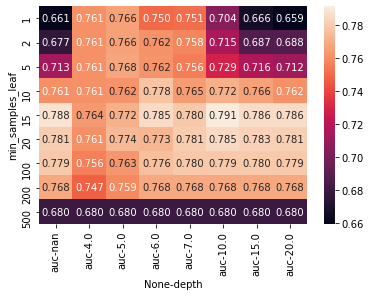

In [67]:
sns.heatmap(df_pivot, annot=True, fmt='.3f')

In [68]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [69]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

# Ensemble Learning and Random Forest